<a href="https://colab.research.google.com/github/Agbltnb/Ia/blob/main/ProvaIa2questao2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROVA 2 - questão 2

Universidade Federal da Paraíba - IA - Prova 2
Aluna: Ana Maria Pinto da Silva Nascimento - 20160143190
Profª. Thaís Gaudencio
Enuncida da Questão 
Utilizando a base de dados Wine DataSet, utilize dois algoritmos não supervisionados, podendo ser K-means, Hierárquico ou outros de sua escolha. Ambos os modelos devem ser analisados através da métrica silhueta ou outra métrica de sua escolha. Os resultados devem ser discutidos.

Obs.: Originalmente, é uma base para classificação, dessa forma deve-se remover o primeiro atributo, referente à classe.

Dataset utilizado:

https://drive.google.com/file/d/16DZggHr5lShbHj0ZscKNiYvMVm8mTrX_/view



# **Descrição dos dados do database**

Os dados usados ​​neste experimento foram obtidos da base de dados UCI do conjunto de dados de vinhos italianos, que continha um tamanho de amostra de 178. Os dados contidos em cada variável são o resultado de uma análise química. Os vinhos italianos mostrados na amostra são cultivados na mesma área, mas de variedades diferentes. O conjunto de dados consiste em um total de 13 variáveis ​​numéricas.

(0) Álcool: Teor alcoolico.

(1) Ácido málico: É um tipo de ácido com forte acidez e aroma de maçã. O vinho tinto é naturalmente acompanhado de ácido málico.

(2) Cinzas: A essência das cinzas é um sal inorgânico, que afeta o sabor geral do vinho e pode dar uma sensação de frescor ao vinho. (3) Alcalinidade das cinzas: É uma medida de alcalinidade fraca dissolvida em água.

(4) Magnésio: é um elemento essencial do corpo humano, que pode promover o metabolismo energético e é fracamente alcalino.

(5) Fenóis totais: moléculas contendo substâncias polifenólicas, que têm um sabor amargo e afetam o sabor, a cor e o sabor do vinho, e pertencem aos nutrientes do vinho.

(6) Flavanóides: É um antioxidante benéfico para o coração e anti-envelhecimento, rico em aroma e amargo.

(7) Fenóis não flavonóides: É um gás aromático especial com resistência à oxidação e é fracamente ácido.

(8) Proantocianinas: É um composto bioflavonóide, que também é um antioxidante natural com um leve cheiro amargo.

(9) Intensidade da cor: refere-se ao grau de tonalidade da cor. É usado para medir o estilo do vinho para ser “leve” ou “espesso”. A intensidade da cor é alta, entretanto quanto mais tempo o vinho e o suco de uva ficam em contato durante o processo de vinificação, mais espesso é o sabor.

(10) Matiz: refere-se à vivacidade da cor e ao grau de calor e frio. Ele pode ser usado para medir a variedade e idade do vinho. 2019 5ª Conferência Internacional sobre Tecnologia da Educação, Gestão e Ciências Humanas (ETMHS 2019) Copyright © (2019) Francis Academic Press, Reino Unido 1443 DOI: 10.25236 / etmhs.2019.309 Os vinhos tintos com idades superiores terão uma tonalidade amarela e maior transparência. A intensidade da cor e o tom são indicadores importantes para avaliar a qualidade da aparência de um vinho.

(11) Prolina: É o principal aminoácido do vinho tinto e uma parte importante da nutrição e do sabor do vinho.

(12) OD280 / OD315 de vinhos diluídos: É um método de determinação da concentração de proteínas, que permite determinar o teor de proteínas de vários vinhos.

**Importação de bibliotecas**
Importaremos as bibliotecas que serão necessárias para a solução desta questão.

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn import cluster, neighbors, svm, metrics, preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



#ignore warnings
#warnings.filterwarnings('ignore')

# Open the data



**Carregando o dataset**

In [5]:
df = pd.read_csv('wine.csv')
df.head()



wine_names = ['Alcohol',
            'Malic_acid',
            'Ash', 
           'Alcalinity_of_ash',  
           'Magnesium', 
            'Total_phenols', 
            'Flavanoids',
            'Nonflavanoid_phenols',
            'Proanthocyanins',  
            'Color_intensity','Hue', 'OD280/OD315_of_diluted_wines',
            'Proline']


In [ ]:
print('Informações:  \n')
df.info

Informações:  



<bound method DataFrame.info of      Unnamed: 0  Alcohol  ...  OD280/OD315_of_diluted_wines  Proline
0             0    14.23  ...                          3.92     1065
1             1    13.20  ...                          3.40     1050
2             2    13.16  ...                          3.17     1185
3             3    14.37  ...                          3.45     1480
4             4    13.24  ...                          2.93      735
..          ...      ...  ...                           ...      ...
173         173    13.71  ...                          1.74      740
174         174    13.40  ...                          1.56      750
175         175    13.27  ...                          1.56      835
176         176    13.17  ...                          1.62      840
177         177    14.13  ...                          1.60      560

[178 rows x 14 columns]>

Como é necessário eliminar a primeira coluna, logo o código abaixo mostra essa eliminação

In [6]:
df.dropna()
df = df.drop(['Unnamed: 0'], axis=1)
#df = df.drop(['a'], axis=1) #fiz esse pois, eu modifiquei manualmente no csv.
#caso contrario é comentar essa linha acima, e descomentar a df.drop unnamed
df

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Algo interessante a se fazer é verificar a correlação

In [7]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


Será necessário verificar se existe atributos faltantes em nossa base de dados.

In [8]:
#print('Valores faltantes:', df.isnull().sum()) #quantidade de valores faltantes para todos os atributos
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

Mas mesmo com a retirada de um atributo ainda temos 12 atributos restantes, logo devemos fazer a redução de dimensionalidade com PCA

In [9]:
x = df.loc[:, wine_names].values
x = StandardScaler().fit_transform(x)

x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

Agora devemos aplicar o PCA para reduzir para 2, as 12 dimensão dos dados.

In [12]:
from sklearn.preprocessing import StandardScaler
#std_wine = StandardScaler().fit_transform(df) # normalizing the data 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data = principalComponents, columns = ['Componente Principal 1', 'Componente Principal 2'])

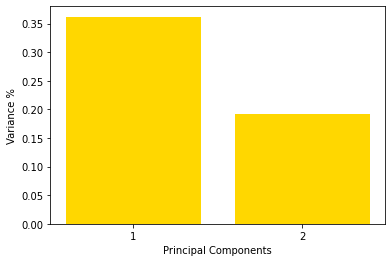

In [13]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

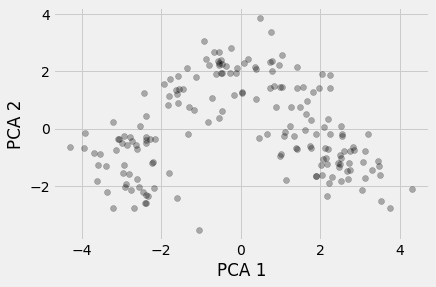

In [16]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


#plt.style.use('fivethirtyeight')
#principalDF.plot.scatter(x = 'Componente Principal 1', y = 'Componente Principal 2', colormap='jet')
#plt.xlabel('Componente Principal 1', fontsize = 9)
#plt.ylabel('Componente Principal 2', fontsize = 9)

Utilizando o método do cotovelo, e a partir do seu gráfico podemos determinar a quantidade de clusters do dataset.

In [17]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [18]:
def calculate_wcss(data):
        wcss = []
        for n in range(2, 21):
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X=data)
            wcss.append(kmeans.inertia_)
    
        return wcss

In [19]:
sum_of_squares = calculate_wcss(df)
n = optimal_number_of_clusters(sum_of_squares)

kmeans = KMeans(n_clusters=n)
clusters = kmeans.fit_predict(df)
x1, x2 = 2, 20
intervalo = range(x1,x2+1)

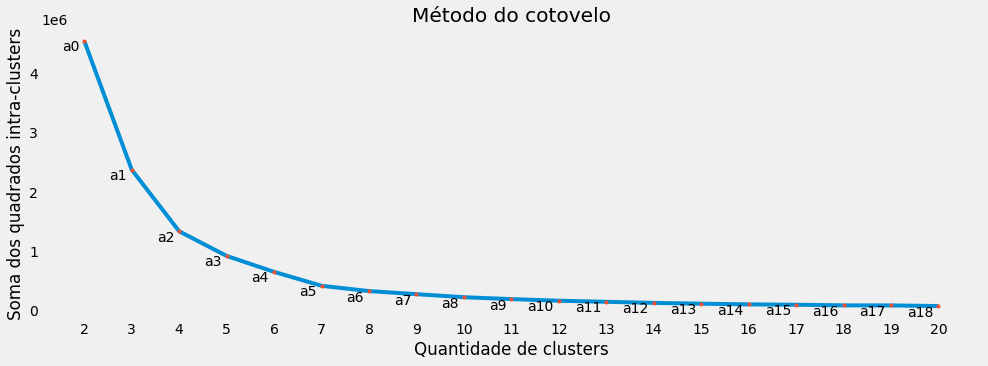

In [20]:
plt.figure(figsize=(15,5))
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.grid()
plt.xticks(intervalo)
plt.plot(intervalo, sum_of_squares) # pontos laranjas
plt.plot(intervalo, sum_of_squares, '.') # linha azul
for x,y in zip(intervalo,sum_of_squares): # colocando nome nos pontos
    label = "a{}".format(x-2)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(-5,-10),
                 ha='right')
plt.show()

Aqui mostra que 3 clusters é o suficiente


Aqui farei outro gráfico de cotovelo

In [22]:
X =df.values[:, 1:]
Clus_dataset = StandardScaler().fit_transform(X)

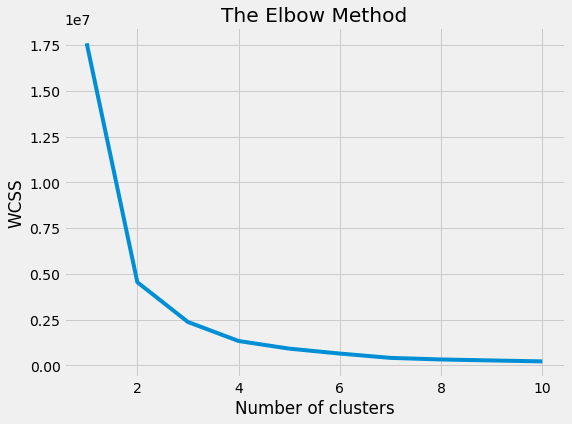

In [23]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

A partir daqui, utilizando o dataset que foi tratado com as ferramentas de pré-processamento, e utilizamos  o método de elbow para determinar  k = 3 para o número de clusters.

In [24]:
# build the model with the output from elbow method which is 3
clusterNum = 3
k_means =KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


In [25]:
# We assign the labels to each row in dataframe.
df['Clus_km'] = labels
print(df.head())

print(df.groupby('Clus_km').mean())

   Alcohol  Malic_acid   Ash  ...  OD280/OD315_of_diluted_wines  Proline  Clus_km
0    14.23        1.71  2.43  ...                          3.92     1065        1
1    13.20        1.78  2.14  ...                          3.40     1050        1
2    13.16        2.36  2.67  ...                          3.17     1185        1
3    14.37        1.95  2.50  ...                          3.45     1480        1
4    13.24        2.59  2.87  ...                          2.93      735        0

[5 rows x 14 columns]
           Alcohol  Malic_acid  ...  OD280/OD315_of_diluted_wines      Proline
Clus_km                         ...                                           
0        12.929839    2.504032  ...                      2.365484   728.338710
1        13.804468    1.883404  ...                      3.114043  1195.148936
2        12.516667    2.494203  ...                      2.490725   458.231884

[3 rows x 13 columns]


- As coordenadas dos centroides são as seguintes:

   Componente Principal 1  Componente Principal 2
0                2.288882               -0.959947
1               -0.076018                1.736061
2               -2.743930               -1.214191 

- Abaixo podemos ver de forma gráfica a divisão das instâncias nos 3 clusters e seus centroides.



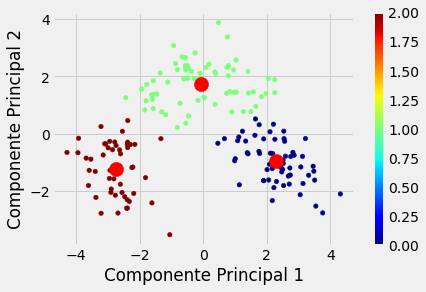

In [34]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 1234).fit(principalDF.iloc[:,[0,1]])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(principalDF.iloc[:,[0,1]].columns.values))

print('- As coordenadas dos centroides são as seguintes:\n')
print(centroids_df, '\n')
print('- Abaixo podemos ver de forma gráfica a divisão das instâncias nos 3 clusters e seus centroides.\n')

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1, 1)
principalDF.plot.scatter(x = 'Componente Principal 1', y = 'Componente Principal 2', c= kmeans.labels_, colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'Componente Principal 1', y = 'Componente Principal 2', ax = ax,  s = 200, mark_right=False, color=['red'])

# Hierarquico

Na questão solicita que façamos a utilização de dois algoritmos.

Chamada do dataset que iremos utilizar

In [36]:
from scipy.spatial import distance_matrix
print(pd.DataFrame(distance_matrix(principalDF.values, principalDF.values), index=df.index, columns=principalDF.index))

          0         1         2    ...       175       176       177
0    0.000000  2.093633  0.900010  ...  6.137650  5.767329  6.658761
1    2.093633  0.000000  1.398713  ...  5.784495  5.296078  6.243515
2    0.900010  1.398713  0.000000  ...  5.475005  5.064591  5.983408
3    1.384777  3.455679  2.124804  ...  6.434907  6.161206  6.965835
4    2.378064  1.699730  1.516437  ...  4.143459  3.683763  4.625500
..        ...       ...       ...  ...       ...       ...       ...
173  6.731783  6.134913  6.005367  ...  0.881143  0.986842  0.575820
174  5.927018  5.245996  5.169936  ...  1.006534  0.581314  1.179714
175  6.137650  5.784495  5.475005  ...  0.000000  0.547228  0.530979
176  5.767329  5.296078  5.064591  ...  0.547228  0.000000  0.947438
177  6.658761  6.243515  5.983408  ...  0.530979  0.947438  0.000000

[178 rows x 178 columns]


In [30]:
data = customer_data.iloc[:, 1:3].values

Em seguida, precisamos saber em quais clusters queremos que nossos dados sejam divididos. Vamos usar novamente a scipybiblioteca para criar os dendrogramas para nosso conjunto de dados. Execute o seguinte script para fazer isso:

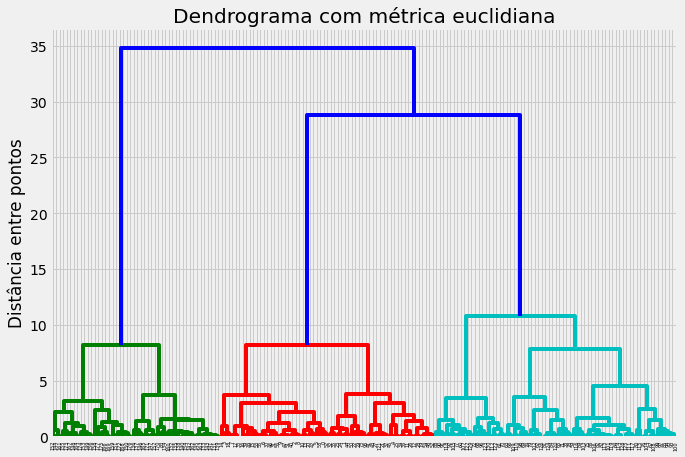

In [44]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))
plt.style.use('fivethirtyeight')
plt.title('Dendrograma com métrica euclidiana')
plt.ylabel('Distância entre pontos')
dend = sch.dendrogram(sch.linkage(principalDF, method='ward', metric='euclidean'))

A partir do dendograma acima, podemos perceber que o número de clusters são 3.

In [42]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)


array([0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2,
       2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2,
       0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 1])

Como uma etapa final, vamos representar graficamente os clusters para ver como nossos dados foram realmente agrupados:

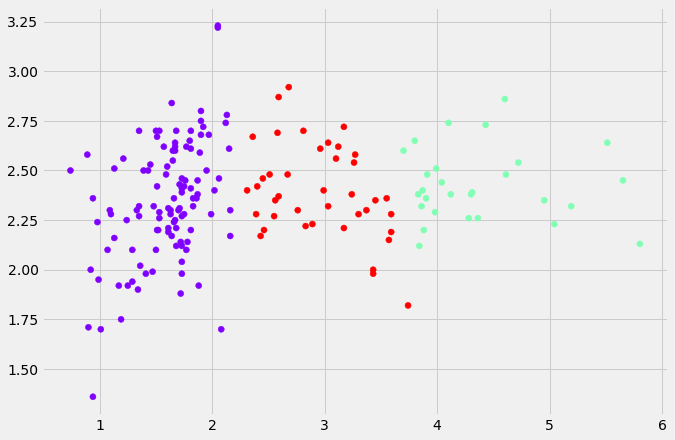

In [43]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')


Você pode ver os pontos de dados na forma de cinco clusters.

# Conclusão

A partir do dataset disponibilizado pelo docente, aplicou-se dois diferentes algoritmos.

Ao decorrer da solução da questão percebeu-se a necessidade de redução de dimensionalidade. Para que fosse possivel definir o número de clusters que seria necessário para aplicar no algoritmo K-means.
E, para a solução através do modelo hierarquico que mostrou que a nossa escolha de numero de clusters estava correta.